<h1><strong><u>Digits Clustering</u></strong></h1>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, pair_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
import matplotlib.ticker as plticker

<h2><strong><u>Data Preparation</u></strong></h2>

In [3]:
data = load_digits(as_frame=True)
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [4]:
X = data.data
y = data.target
display(X.head())
display(y.head())

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int64

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
display(X_train.shape) 
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1347, 64)

(450, 64)

(1347,)

(450,)

<h2><strong><u>K-Means Model Selection</u></strong></h2>

Text(0.5, 1.0, 'Silhouette Chart')

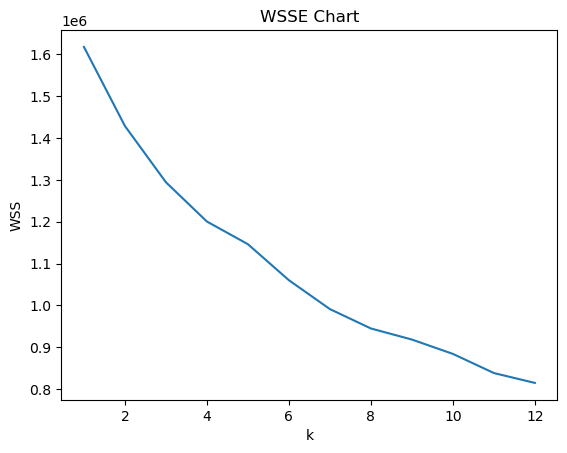

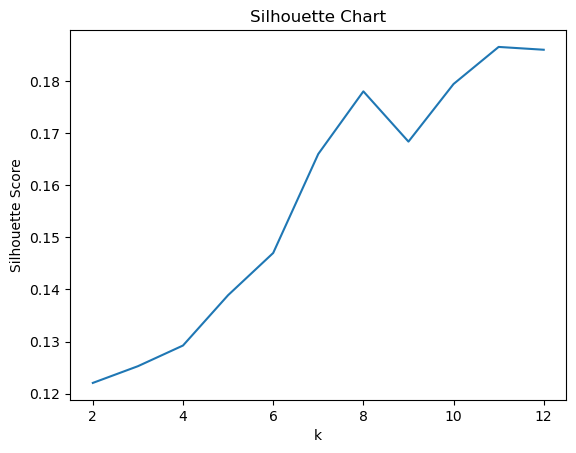

In [11]:
wss_values = []
sil_values = []
maximum = 13
wsse_range = range(1,maximum)
sil_range = range(2,maximum)

for k in wsse_range:
    clusters = KMeans(n_clusters=k).fit(X_train)
    wss_values.append(clusters.inertia_)
    if k > 1: sil_values.append(silhouette_score(X_train, clusters.labels_))

plt.plot(wsse_range, wss_values)
plt.xlabel("k")
plt.ylabel("WSS")
plt.title("WSSE Chart")
plt.figure()
plt.plot(sil_range, sil_values)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Chart")

In [12]:
sil_values.index(max(sil_values))

9

<h3><strong><u>Validation Curves</u></strong></h3>

In [21]:
def raw_inertia_metric(estimator, X, y=None):
    # This function is used by make_scorer.
    # The estimator passed to this function within the CV process 
    # will already be the fit estimator for the current fold.
    return estimator.inertia_

wsse_scorer = make_scorer(raw_inertia_metric, greater_is_better=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    2.9s finished


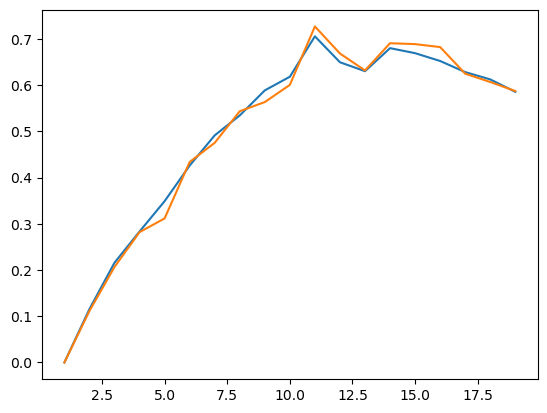

In [ ]:
pipeline = Pipeline(
    [
        ("kmeans", KMeans())
    ]
)
clusters = list(range(1,20))

train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='adjusted_rand_score',
                                                   param_name="kmeans__n_clusters",
                                                   param_range=clusters,
                                                   verbose=1,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.plot(clusters, train_scores_mean)
plt.plot(clusters, validation_scores_mean)
plt.title("KMeans Clusters: Adjusted Rand Index")